In [32]:
from pomegranate import*


In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kde
import json

In [158]:
from hmm_helpers import build_hmm
from helpers import WindowType

In [159]:
sns.set(color_codes=True)

In [160]:
ffile = "../"
hmm_file = ffile + "HMM_Model_0.json"
path = ffile 

In [161]:
#from IPython.core.debugger import set_trace

with open(hmm_file) as json_file:
    hmm_json_map = json.load(json_file)
    hmm_json_map = json.loads(hmm_json_map)
    #print(hmm_json_map)
    
    print("Start state: ")
    print("Distribution: ", hmm_json_map["start"]["distribution"])
    
    print("End state:")
    print("Distribution: ", hmm_json_map["end"]["distribution"])
    
    states = hmm_json_map["states"]
    
    #set_trace()
    
    for state in states:
        print("====================================================")
        print("State: ", state["name"])
        print("State weight: ", state["weight"])
        distribution = state["distribution"]
        
        if distribution is not None:
        
            print("Distribution: ", distribution["class"])
            
            if distribution["class"] == "Distribution":
                print("Distribution name: ", distribution["name"])
                
                if distribution["name"] == "IndependentComponentsDistribution":
                    distributions = distribution["parameters"][0]
                    for dist in distributions:
                        
                        if dist["class"] == "GeneralMixtureModel":
                            gmm_distributions = dist["distributions"]
                
                            for gmm_dist in gmm_distributions:
                                print("Distribution name: ", gmm_dist["name"])
                                print("Distribution params: ", gmm_dist["parameters"])
                            print("Weights: ", dist["weights"])
                        else:
                        
                        #print(dist)
                            print("Distribution name: ", dist["name"])
                            print("Distribution params: ", dist["parameters"])
                            print("Weights: ", distribution["parameters"][1])
            elif distribution["class"] == "GeneralMixtureModel":
                distributions = distribution["distributions"]
                
                for dist in distributions:
                    print("Distribution name: ", dist["name"])
                    print("Distribution params: ", dist["parameters"])
                print("Weights: ", distribution["weights"])
             

Start state: 
Distribution:  None
End state:
Distribution:  None
State:  GAP_STATE
State weight:  1.0
Distribution:  Distribution
Distribution name:  IndependentComponentsDistribution
Distribution name:  UniformDistribution
Distribution params:  [-999.3455711329824, -998.6544288670176]
Weights:  [1.0, 1.0]
Distribution name:  UniformDistribution
Distribution params:  [-999.3455711329824, -998.6544288670176]
Weights:  [1.0, 1.0]
State:  OTHER_0
State weight:  1.0
Distribution:  Distribution
Distribution name:  IndependentComponentsDistribution
Distribution name:  NormalDistribution
Distribution params:  [22.149529147269586, 6.472017206119533]
Weights:  [1.0, 1.0]
Distribution name:  NormalDistribution
Distribution params:  [17.60325625601016, 4.265111039561485]
Weights:  [1.0, 1.0]
State:  TUF
State weight:  1.0
Distribution:  Distribution
Distribution name:  IndependentComponentsDistribution
Distribution name:  NormalDistribution
Distribution params:  [7.776193623549874, 4.187483737430

In [162]:
# this is the model we trained
hmm = build_hmm(hmm_file)

# make sure that no updsates occur
#hmm.freeze()

Working with state:  GAP_STATE
Working with state:  OTHER_0
Working with state:  TUF
Working with state:  HMM_Model-start
Working with state:  HMM_Model-end
Orphan state HMM_Model-start removed due to no edges                             leading to it
Orphan state HMM_Model-end removed due to no edges                             leading to it


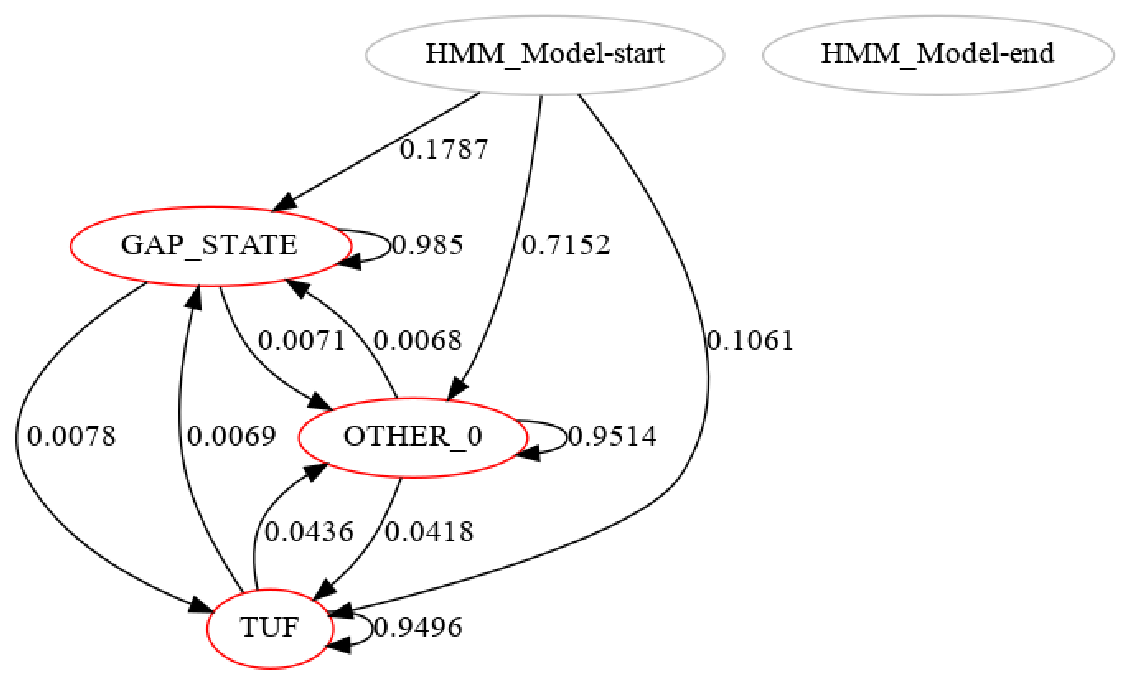

In [163]:
# visualize the model we just trained
plt.figure( figsize=(20,18) )
hmm.plot()
plt.show()

In [164]:
# load a sequence other than that we trained the HMM
from train import make_window_regions
from helpers import read_configuration_file

In [165]:
configuration=read_configuration_file("config.json")
print(configuration)

{'regions': {'start': [1000000], 'end': [10000000]}, 'chromosome': 'chr1', 'reference_file': {'filename': '/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'}, 'no_wga_file': {'filename': '/scratch/spectre/a/ag568/m585_verysensitive_trim_sorted.bam'}, 'test_file': {'filename': '/scratch/spectre/a/ag568/m605_verysensitive_trim_sorted.bam'}, 'debug': {'log_bam_for_debug': False}, 'window_size': 100, 'fill_missing_window_data': False, 'fill_missing_window_data_factor': 0, 'quality_threshold': None, 'save_windows': False, 'remove_windows_with_N': False, 'mark_N_windows': True, 'mark_for_N_windows': -999.0, 'windows_filename': 'hmm_windows.json', 'outlier_remove': {'name': 'zscore', 'config': {'sigma_factor': 2}}, 'label_clusters': True, 'labeler': {'name': 'mean_diff', 'tuf_mean_min': 1.5, 'tuf_mean_max': 8.5, 'states': ['DELETE', 'OTHER', 'OTHER', 'TUF']}, 'clusterer': {'name': 'kmedoids', 'config': {'init_cluster_idx': 'random_from_data', 'metric': 'MANHATAN', 'fea

In [166]:
#configuration["regions"]["start"]=[2000000]
#configuration["regions"]["end"]=[3000000]
#configuration["remove_windows_with_N"]=True

In [167]:
regions = make_window_regions(configuration=configuration)

INFO: Window size: 100
INFO: Chromosome:  chr1
INFO: Regions used {'start': [1000000], 'end': [10000000]}
INFO: Start index: 1000000
INFO: End index:   10000000
INFO: Creating WGA Windows...
INFO: Reference file: b'/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'
INFO: Alternative file: b'/scratch/spectre/a/ag568/m605_verysensitive_trim_sorted.bam' 
INFO: Not using quality threshold


INFO: Number of errors: 0
INFO: Number of adjusted: 0
INFO: Bam length: 8745784
INFO: Extracting common bases


INFO: Estimated number of windows: 87457 
INFO: Start Window: Start/End idx (1000000, 1000099)
INFO: End Window: Start/End idx (9999900, 9999999)
INFO: Number of WGA windows: 90000
INFO: Creating No WGA Windows...
INFO: Reference file: b'/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'
INFO: Alternative file: b'/scratch/spectre/a/ag568/m585_verysensitive_trim_sorted.bam' 
INFO: Not using quality threshold


INFO: Number of errors: 0
INFO: Number of adjusted: 0
INFO: Bam length: 8948176
INFO: Extracting common bases


INFO: Estimated number of windows: 89481 
INFO: Start Window: Start/End idx (1000000, 1000099)
INFO: End Window: Start/End idx (9999900, 9999999)
INFO: Number of non-wga windows: 90000
INFO: Marking N  windows with: -999.0
INFO: Marked as N 436 Windows
INFO: Number of mixed windows: 90000
INFO: Number of N windows: 436
INFO: Number of windows after outlier removal: 85862
INFO: Number of N windows after outlier removal 436


In [168]:
print("Number or regions: {0}".format(len(regions)))

Number or regions: 1


In [169]:
# create a sequence from region 0
#sequence = regions[0].get_sequence(size=50, window_type=WindowType.BOTH)


In [170]:
#print(sequence)

Run the Viterbi algorithm on the sequence given the model. This finds the ML path of hidden states given the sequence. Returns a tuple of the log probability of the ML path, or (-inf, None) if the sequence is impossible under the model. 
If a path is returned, it is a list of tuples of the form (sequence index, state object).

In [141]:
n_seqs=None

In [174]:

sequences = regions[0].get_region_as_sequences(size=100, window_type=WindowType.BOTH, n_seqs=n_seqs)

# make sure we have as many sequences we requested
#assert len(sequences) == n_seqs, "Invalid number of sequences"

In [175]:
print("Number of sequences: ", len(sequences))

Number of sequences:  858


In [178]:

for i, seq in enumerate(sequences):
    #print(seq)
    if (-999.0, -999.0) in seq:
        print(seq)
        print("Sequence index: ", i)
        viterbi_path=hmm.viterbi(seq)
    
        print("Log-probability of ML Viterbi path: ", viterbi_path[0])
        
        if viterbi_path[1] is not None:
            print("Viterbi path length: ", len(viterbi_path[1]))

            for item in range(len(seq)):
                print("sequnce item: {0} state {1}".format(seq[item], viterbi_path[1][item][1].name))


[(0.0, 7.5), (0.0, 10.68), (0.0, 30.62), (1.18, 16.4), (0.36, 11.56), (0.37, 17.27), (0.2, 23.65), (0.69, 21.78), (0.34, 25.83), (0.0, 32.01), (0.0, 15.75), (0.0, 8.58), (0.0, 29.94), (0.0, 11.61), (0.0, 4.36), (0.0, 8.85), (0.0, 11.5), (0.0, 4.19), (0.0, 7.09), (0.0, 9.88), (0.0, 3.84), (0.0, 7.32), (0.0, 8.5), (0.0, 6.5), (0.0, 8.44), (0.0, 7.65), (0.0, 6.06), (0.0, 6.37), (0.0, 3.33), (0.0, 8.88), (0.0, 7.06), (0.0, 8.6), (0.0, 6.66), (0.17, 13.2), (0.93, 18.82), (1.24, 17.87), (1.49, 14.1), (1.21, 21.68), (0.93, 14.53), (0.0, 16.95), (0.0, 14.08), (0.0, 14.52), (0.71, 22.8), (0.3, 10.19), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -

In [152]:
for seq in sequences:
    
    #print(seq)
    
    viterbi_path=hmm.viterbi(sequence)
    
    print("Log-probability of ML Viterbi path: ", viterbi_path[0])

    if viterbi_path[1] is not None:
        print("Viterbi path length: ", len(viterbi_path[1]))

        for item in range(len(sequence)):
            print("sequnce item: {0} state {1}".format(sequence[item], viterbi_path[1][item][1].name))

Log-probability of ML Viterbi path:  -308.15708558696815
Viterbi path length:  51
sequnce item: (9.43, 13.97) state HMM_Model-start
sequnce item: (10.04, 17.67) state TUF
sequnce item: (5.79, 20.48) state TUF
sequnce item: (6.51, 14.78) state TUF
sequnce item: (3.56, 12.71) state TUF
sequnce item: (3.8, 10.36) state TUF
sequnce item: (6.08, 18.61) state TUF
sequnce item: (4.2, 14.47) state TUF
sequnce item: (8.21, 16.02) state TUF
sequnce item: (4.88, 16.04) state TUF
sequnce item: (4.5, 11.32) state TUF
sequnce item: (7.84, 11.99) state TUF
sequnce item: (6.01, 16.64) state TUF
sequnce item: (5.92, 12.69) state TUF
sequnce item: (7.27, 12.84) state TUF
sequnce item: (9.63, 20.04) state TUF
sequnce item: (13.57, 23.64) state TUF
sequnce item: (6.03, 19.3) state TUF
sequnce item: (9.42, 22.03) state TUF
sequnce item: (10.33, 18.97) state TUF
sequnce item: (7.69, 11.76) state TUF
sequnce item: (5.68, 20.36) state TUF
sequnce item: (7.86, 23.11) state TUF
sequnce item: (12.01, 19.74) stat

sequnce item: (6.57, 18.49) state TUF
sequnce item: (8.46, 21.79) state TUF
sequnce item: (6.01, 18.84) state TUF
sequnce item: (5.65, 21.11) state TUF
sequnce item: (7.73, 15.61) state TUF
sequnce item: (6.51, 15.18) state TUF
sequnce item: (5.74, 16.61) state TUF
sequnce item: (7.18, 10.48) state TUF
sequnce item: (5.69, 15.53) state TUF
sequnce item: (4.81, 13.09) state TUF
sequnce item: (7.27, 19.48) state TUF
sequnce item: (11.82, 17.84) state TUF
sequnce item: (5.74, 13.27) state TUF
sequnce item: (8.13, 12.76) state TUF
sequnce item: (10.51, 13.56) state TUF
sequnce item: (8.58, 12.53) state TUF
sequnce item: (10.07, 17.9) state TUF
sequnce item: (10.5, 10.61) state TUF
sequnce item: (9.7, 11.99) state TUF
Log-probability of ML Viterbi path:  -308.15708558696815
Viterbi path length:  51
sequnce item: (9.43, 13.97) state HMM_Model-start
sequnce item: (10.04, 17.67) state TUF
sequnce item: (5.79, 20.48) state TUF
sequnce item: (6.51, 14.78) state TUF
sequnce item: (3.56, 12.71) st

In [153]:
p_d_given_m = hmm.log_probability(sequence=sequences[150])
print("P(D|M): ", p_d_given_m)

print(sequences[0])
print(hmm.predict_proba(sequences[0]))

IndexError: list index out of range